In [99]:
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import gzip

df = pd.read_table("SNV/MANIFEST.txt")
fileslist = []
header = []
for file_name in df[0:33]["filename"]:
    fileslist.append(file_name)
with gzip.open("SNV/"+fileslist[0],"rb") as f:
    print(f)
    i = 0
    while i <=4:
        header.append(f.readline())
        i += 1
    table = pd.read_csv(f, delimiter = "\t")
table

<gzip _io.BufferedReader name='SNV/02747363-f04a-4ba6-a079-fe4f87853788/TCGA.UCS.mutect.02747363-f04a-4ba6-a079-fe4f87853788.DR-10.0.somatic.maf.gz' 0x2580aee8a00>


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,SLC6A9,6536,BI,GRCh38,chr1,44008472,44008472,+,Silent,SNP,...,PASS,ACACCGGCGCA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,NaN,COSM6063461;COSM6063462,True,Valid
1,PLK3,1263,BI,GRCh38,chr1,44803280,44803280,+,Missense_Mutation,SNP,...,PASS,CCCCCGATCGA,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,NaN,NaN,True,Valid
2,C1orf168,199920,BI,GRCh38,chr1,56740711,56740711,+,Silent,SNP,...,PASS,TCTTTCGACTT,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,common_in_exac,NaN,True,Unknown
3,GBA,2629,BI,GRCh38,chr1,155233116,155233116,+,3'Flank,SNP,...,PASS,GCATGCAGCGG,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,NaN,NaN,False,Unknown
4,FCRL4,83417,BI,GRCh38,chr1,157581530,157581530,+,Splice_Site,SNP,...,PASS,ACAAACCTGAC,85b191fa-e8f6-4d97-bc13-0bc236cee6c8,3d52eda9-5f36-4a55-8a3c-07a576a0ef1f,6c3037f4-9838-4b36-9551-99e91cb85ef0,14213209-2217-4812-9a19-d9b2b6718467,NonExonic,NaN,True,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,RS1,6247,BI,GRCh38,chrX,18642139,18642139,+,Silent,SNP,...,PASS,CGGTCCGAGTT,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,NaN,NaN,True,Unknown
10445,UBA1,7317,BI,GRCh38,chrX,47201524,47201524,+,Missense_Mutation,SNP,...,PASS,CGGGTTTGAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,NaN,NaN,True,Unknown
10446,PGAM4,441531,BI,GRCh38,chrX,77969434,77969434,+,Missense_Mutation,SNP,...,PASS,CACTGTCCAGA,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,NaN,NaN,True,Unknown
10447,GPRASP1,9737,BI,GRCh38,chrX,102657224,102657224,+,Missense_Mutation,SNP,...,PASS,TCAGCCTGATC,1d4f6015-1138-4d11-ae68-5034b9af7511,810c44b5-8901-4877-8ca6-bedfd040e0c2,e052d1b5-8959-43df-916a-8dce7977fdc0,200f77a5-803c-4891-980b-5c3b08c91254,NaN,NaN,True,Unknown


In [100]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Columns: 120 entries, Hugo_Symbol to GDC_Validation_Status
dtypes: bool(1), float64(39), int64(10), object(70)
memory usage: 9.5+ MB


In [101]:
Y = table["Chromosome"] #independent variables
Hugo_Symbol = table["Hugo_Symbol"]
X = table.drop(["Chromosome","Hugo_Symbol"], axis = 1) #dependent variables

In [102]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10439, 10416, 10364, 10349, 10347, 10224, 10007, 9970, 9970, 9970, 9970, 9970, 9908, 9848, 9848, 9583, 8701, 8672, 8587, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8312, 8040, 7821, 7821, 7821, 4855, 4461, 3906, 2533, 2186, 1447, 1446, 1446, 1315, 1314, 1077, 942, 689, 626, 621, 621, 515, 202, 202, 202, 85, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [103]:
def handle_nan_values(X):
    
    MC3_replace = {"Unknown": False,"False":False,"True":True}
    CAN_replace = {np.nan: "NO"}
    PICK_replace = {np.nan: 0.0}
    PHENO_replace = {np.nan: "trait","1":"disease","0":"phenotype"}
    MINI_replace = {np.nan:0}
    GENE_PHENO_replace = {np.nan:2}
    
    #Handle nullvalues in specific columns
    X["CANONICAL"] = X["CANONICAL"].replace(CAN_replace)
    X["PICK"] = X["PICK"].replace(PICK_replace)
    X["PHENO"] = np.where((X.PHENO == "1;0"), "NaN", X.PHENO)
    X["PHENO"] = X["PHENO"].replace(PHENO_replace)
    X["MINIMISED"] = X["MINIMISED"].replace(MINI_replace)
    X["GENE_PHENO"] = X["GENE_PHENO"].replace(GENE_PHENO_replace)
    
    #Handle mixed types in MC3_Overlap column
    if X["MC3_Overlap"].dtype == "object":
        X["MC3_Overlap"] = X["MC3_Overlap"].replace(MC3_replace)
    
    #Remove columns with all rows values as null
    X.dropna(axis=1,how="all", inplace = True)
    
    #Remove columns that are below treshold 0.70(70%)
    length = len(Y)
    thresh = length*0.70
    X.dropna(axis=1,thresh=int(thresh), inplace = True)
         
    #Fill remaining null values
    cateogry_columns = X.select_dtypes("object").columns
    for column in X.columns:
        if X[column].isnull().any():
            if(column in cateogry_columns):
                X[column] = X[column].fillna("NaN")
            else:
                X[column] = X[column].fillna(0)
    
    return X

In [104]:
def get_similar_value_cols(X):
    thresh = 90
    number_of_cols = 0
    similar_values = []
       
    for c in X.columns:
        #percentage of each value inside columns
        percent_vals = (X[c].value_counts()/len(X)*100).values
        
        #filter columns where more than 90% values are same
        if percent_vals[0] > thresh:
            similar_values.append(c)
            number_of_cols += 1  
    print("Total columns with majority singular value shares: ", number_of_cols)
    return similar_values

In [105]:
def get_duplicated_value_cols(X):
    
    count = 0
    deleted = 0
    columns_not_accepted = {"Exon_Number","Transcript_ID","Allele","Reference_Allele"}
    
    #get matrix of duplicated columns
    duplicated_columns = X.T[X.T.duplicated(keep=False)].T.columns
    print(duplicated_columns)
    
    #remove duplicated columns
    for col in duplicated_columns:
        if col in columns_not_accepted: 
            X.drop(col,axis=1, inplace = True)
            deleted += 1
        count += 1
        
    print("Total columns with duplicated values: ", count)
    print("Number of columns deleted: ", deleted)
    return X

In [106]:
def get_correlated_cols(X):

    # Create correlation matrix
    corr_matrix = X.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    print(to_drop)
    return to_drop

In [107]:
X = handle_nan_values(X)
m = X[X.select_dtypes("bool").columns]
X.drop(get_similar_value_cols(X), axis = 1,inplace=True)
if "MC3_Overlap" not in X.columns:
    X = pd.concat([X,m],axis=1)

Total columns with majority singular value shares:  15


In [108]:
X = get_duplicated_value_cols(X)
X.drop(get_correlated_cols(X), axis = 1,inplace=True)

Index(['Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
       'Transcript_ID', 'Exon_Number', 'Allele', 'Feature', 'EXON'],
      dtype='object')
Total columns with duplicated values:  8
Number of columns deleted:  4
['End_Position']


In [109]:
#Handling categorical values
def handle_categ_values(X):
    labelencoder_x = LabelEncoder()
    
    #Execute LabelEncoder for each categorical column
    for n in X.columns:
        X[n] = labelencoder_x.fit_transform(X[n])
    return X
X = handle_categ_values(X)
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,...,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status,MC3_Overlap
0,1695,3470,13,64,1,432,16,16,0,12,...,1,1,1,902,31,7,20,1,1,1
1,344,3555,9,64,1,637,16,16,0,12,...,2,1,1,3914,31,7,20,1,1,1
2,6058,4646,13,31,49,104,16,16,0,12,...,1,1,1,8997,31,7,20,1,0,1
3,689,9262,0,31,49,1,16,16,0,12,...,3,1,1,6256,31,7,20,1,0,0
4,5014,9325,15,31,49,1,16,16,0,12,...,0,1,1,823,31,7,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,1616,1394,13,31,49,1829,23,23,0,45,...,1,1,1,4484,5,26,45,5,0,1
10445,1921,3761,9,83,20,1,23,23,0,45,...,2,1,1,4483,5,26,45,5,0,1
10446,6697,5959,9,83,1,1,23,23,0,45,...,2,0,0,2998,5,26,45,5,0,1
10447,2491,7105,9,31,49,1,23,23,0,45,...,2,0,2,8480,5,26,45,5,0,1


In [12]:
def forest_test(X, Y):
    #X = StandardScaler().fit_transform(X.values)
    #Y = LabelEncoder().fit_transform(Y.values)
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

forest_test(X, Y)

22.59375
[[230   5   4   4   1   0   1   0   1   0   2  15   1   0   0   9   2   1
    1   4   7   1   1]
 [  6  94   3   2   0   1   0   0   0   0   3   1   0   0   0   5   0   0
    1   3   1   1   0]
 [  2   6 135   6   1   0   2   0   1   0   2   2   0   0   0   8   2   4
    2   3   1   4   0]
 [  2   3  10 153   0   2   0   0   0   0   3   1   0   0   0   7   3   0
    3   4   1   2   1]
 [  3   2   2  11  46   6   0   0   0   0   1   1   0   0   0   1   1   0
    0   1   0   2   1]
 [  2   1  11  10   1  54   1   0   0   0   0   4   0   0   0   1   1   0
    1   4   0   1   0]
 [  4   2   1   1   1   0  57   3   3   0   0   5   0   1   0   2   0   1
    2   2   2   0   2]
 [  1   3   5   2   0   1   0  61   7   1   8   2   0   0   0   4   0   0
    2   1   1   1   1]
 [  4   2   2   8   0   1   1   3 125   0   5   0   0   0   0   4   2   0
    1   6   2   0   0]
 [  0   0   0   0   0   0   0   0  12  17   6   1   0   0   0   2   0   1
    0   0   0   0   2]
 [  5   2   2   3   0

# PCA - Principal Component Analysis

In [12]:
#Standardization of values
st_x= StandardScaler()
m = st_x.fit_transform(X.values)
m

array([[-0.81448475, -0.57516861,  1.29292539, ..., -2.01330818,
         1.72511663,  0.28205261],
       [-1.49984327, -0.54688798, -0.0614722 , ..., -2.01330818,
         1.72511663,  0.28205261],
       [ 1.39885292, -0.1838977 ,  1.29292539, ..., -2.01330818,
        -0.57967095,  0.28205261],
       ...,
       [ 1.72301583,  0.25295494, -0.0614722 , ..., -1.70377241,
        -0.57967095,  0.28205261],
       [-0.41067619,  0.63424445, -0.0614722 , ..., -1.70377241,
        -0.57967095,  0.28205261],
       [ 1.0944746 ,  1.31198157, -0.0614722 , ..., -1.70377241,
        -0.57967095,  0.28205261]])

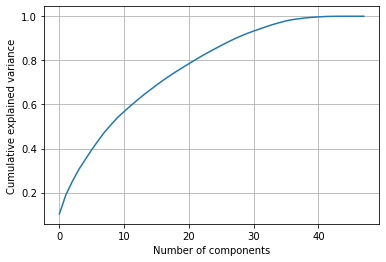

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
pca = PCA().fit(m)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [14]:
m.shape

(10449, 48)

In [15]:
np.mean(m),np.std(m)

(-1.6532749797270012e-17, 1.0)

In [16]:
#def PCA_algorithm(X):
n_components=3
p = PCA(n_components)

X_pca = p.fit_transform(m)

columns = []
i=1
while i <= n_components:
    columns.append("PC"+str(i))
    i+=1

PCA_df = pd.DataFrame(data = X_pca, columns=columns)
    
target = pd.Series(Y, name="Chromosome_Id")
    
PCA_df = pd.concat([PCA_df, target], axis = 1)

#   return PCA_df, m
PCA_df["Chromosome_Id"] = LabelEncoder().fit_transform(PCA_df["Chromosome_Id"])
PCA_df

,PC1,PC2,PC3,Chromosome_Id
0,1.376625,3.013698,-1.405007,0
1,0.801340,-0.144249,-0.116093,0
2,0.779618,1.554427,-3.262459,0
3,-0.217971,-5.128141,1.143080,0
4,0.828641,0.817143,-1.663988,0
...,...,...,...,...
10444,2.148964,3.070827,-1.639788,22
10445,0.916920,-0.477388,-1.386785,22
10446,2.353612,0.703483,3.532996,22
10447,2.193715,0.615658,3.067175,22


In [17]:
print('Explained variation per principal component: {}'.format(p.explained_variance_ratio_))

Explained variation per principal component: [0.10357407 0.08680866 0.06096435]


In [19]:
#Save results from pca
PCA_df.to_csv("Results/PCA/9_Components_02747363-f04a-4ba6-a079-fe4f87853788.csv",index=False)

In [18]:
# Calculate the variance explained by priciple components
print("Variance of each component:", p.explained_variance_ratio_)
print("\n Total Variance Explained:", 
      round(sum(list(p.explained_variance_ratio_))*100, 2))

Variance of each component: [0.10357407 0.08680866 0.06096435]

 Total Variance Explained: 25.13


Text(0.5, 1.0, '2D Principal Component Analysis Scores')

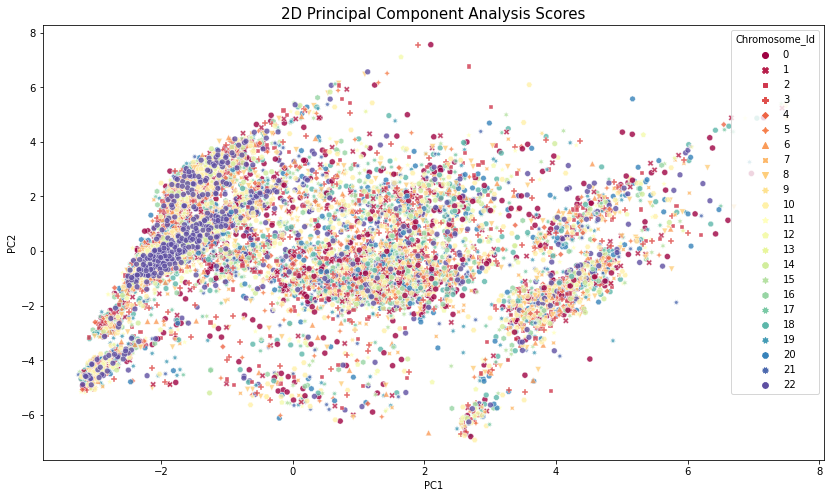

In [19]:
import seaborn as sns
plt.figure(figsize = (14,8))
sns.scatterplot(
    x = "PC1", y = "PC2",
    hue = "Chromosome_Id",
    palette = sns.color_palette("Spectral", 22,as_cmap=True),
    data = PCA_df,
    legend = "full",
    alpha = 0.8,
    style = "Chromosome_Id"
)
plt.title("2D Principal Component Analysis Scores",fontsize=15)

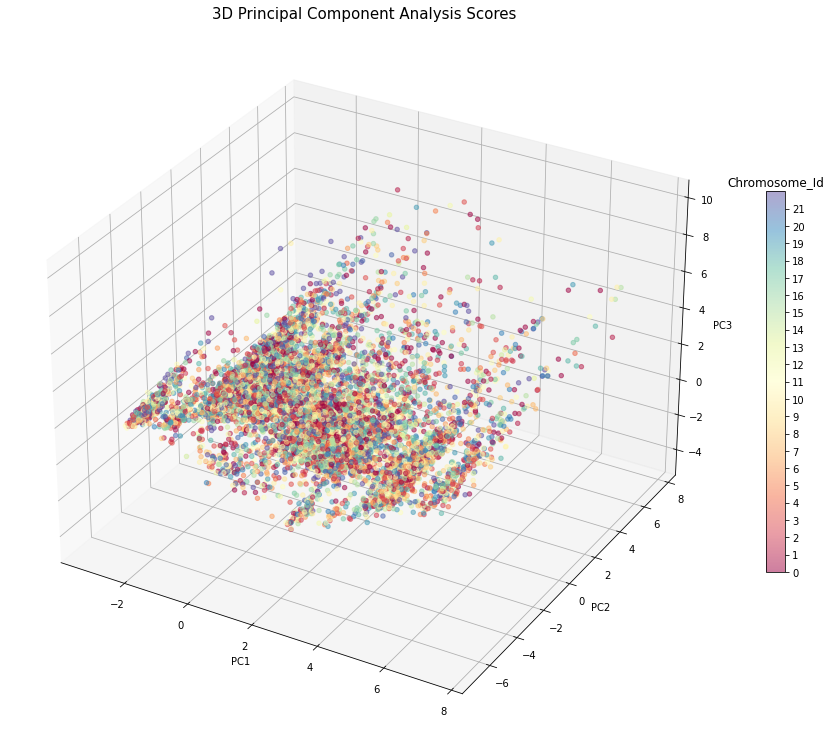

In [20]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(projection='3d')

my_map = sns.color_palette("Spectral", 22,as_cmap=True)

a = ax.scatter(
    xs=PCA_df["PC1"], 
    ys=PCA_df["PC2"], 
    zs=PCA_df["PC3"], 
    c=PCA_df["Chromosome_Id"],
    cmap=my_map,
    alpha = 0.5,
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D Principal Component Analysis Scores",fontsize=15)

clb = plt.colorbar(a,orientation="vertical", shrink = 0.5,ticks=range(22))
clb.ax.set_title("Chromosome_Id")
plt.show()

# LDA - Linear Driscriminant Analysis

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [22]:
model = LinearDiscriminantAnalysis()
model.fit(X,Y)

LinearDiscriminantAnalysis()

In [23]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.19513721608095477


In [24]:
lda = LinearDiscriminantAnalysis(n_components=2)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 48
Reduced number of features: 2


In [56]:
forest_test(X_lda, Y)

NameError: name 'forest_test' is not defined

In [ ]:
def test_lda(x_lda,Y):
    X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                            test_size = 0.30, 
                                                                            random_state = 101)

    start = time.process_time()
    lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
    print(time.process_time() - start)
    predictionlda = lda.predict(X_Test_Reduced)
    print(confusion_matrix(Y_Test_Reduced,predictionlda))
    print(classification_report(Y_Test_Reduced,predictionlda))

In [25]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, Y)
lda.explained_variance_ratio_

array([0.57201387, 0.22802967])

In [26]:
LDA_df = pd.DataFrame(data = X_lda,columns=["LD1","LD2"])
LDA_df

,LD1,LD2
0,0.728672,-0.421482
1,-0.317166,-0.544351
2,0.679700,0.120781
3,1.768366,1.975593
4,1.129380,2.034684
...,...,...
10444,1.843598,-1.215498
10445,1.705084,-0.484604
10446,0.016391,-0.167287
10447,0.268813,0.473801


In [27]:
target = pd.Series(Y, name="Chromosome_Id")
    
LDA_df = pd.concat([LDA_df, target], axis = 1)
LDA_df["Chromosome_Id"] = LabelEncoder().fit_transform(LDA_df["Chromosome_Id"])
LDA_df

,LD1,LD2,Chromosome_Id
0,0.728672,-0.421482,0
1,-0.317166,-0.544351,0
2,0.679700,0.120781,0
3,1.768366,1.975593,0
4,1.129380,2.034684,0
...,...,...,...
10444,1.843598,-1.215498,22
10445,1.705084,-0.484604,22
10446,0.016391,-0.167287,22
10447,0.268813,0.473801,22


Text(0.5, 1.0, 'Linear Driscriminant Analysis Scores')

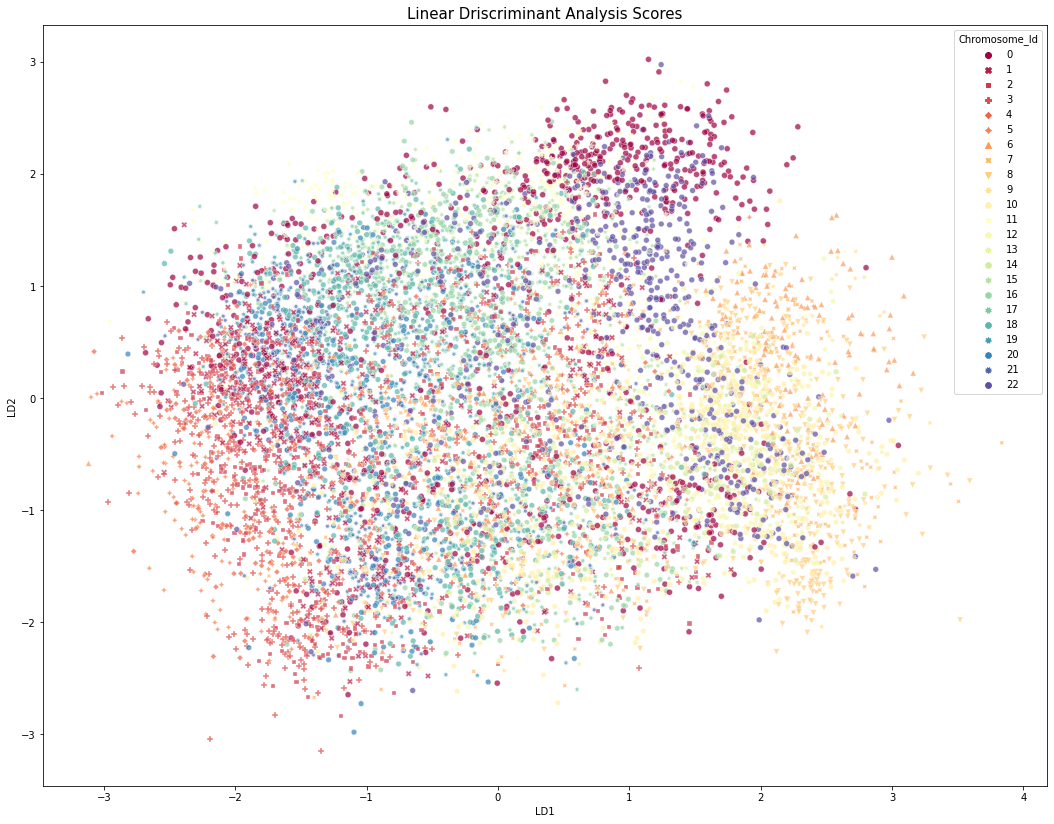

In [28]:
import seaborn as sns
plt.figure(figsize = (18,14))
sns.scatterplot(
    x = "LD1", y = "LD2",
    hue = "Chromosome_Id",
    palette = sns.color_palette("Spectral", 22,as_cmap=True),
    data = LDA_df,
    legend = "full",
    alpha = 0.7,
    style = "Chromosome_Id"
)
plt.title("Linear Driscriminant Analysis Scores",fontsize=15)

## t-SNE

In [29]:
from sklearn.manifold import TSNE

In [31]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, n_iter=300)

tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10449 samples in 0.001s...
[t-SNE] Computed neighbors for 10449 samples in 2.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10449
[t-SNE] Computed conditional probabilities for sample 2000 / 10449
[t-SNE] Computed conditional probabilities for sample 3000 / 10449
[t-SNE] Computed conditional probabilities for sample 4000 / 10449
[t-SNE] Computed conditional probabilities for sample 5000 / 10449
[t-SNE] Computed conditional probabilities for sample 6000 / 10449
[t-SNE] Computed conditional probabilities for sample 7000 / 10449
[t-SNE] Computed conditional probabilities for sample 8000 / 10449
[t-SNE] Computed conditional probabilities for sample 9000 / 10449
[t-SNE] Computed conditional probabilities for sample 10000 / 10449
[t-SNE] Computed conditional probabilities for sample 10449 / 10449
[t-SNE] Mean sigma: 378.254771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.689919
[t-SNE] K

In [37]:
tsne_df = pd.DataFrame(data = tsne_results,columns=["tsne-1","tsne-2"])

target = pd.Series(Y, name="Chromosome_Id")
    
tsne_df = pd.concat([tsne_df, target], axis = 1)
tsne_df["Chromosome_Id"] = LabelEncoder().fit_transform(tsne_df["Chromosome_Id"])
tsne_df

,tsne-1,tsne-2,Chromosome_Id
0,-5.454103,-0.531318,0
1,2.776805,3.417677,0
2,3.509031,-2.206216,0
3,-2.033047,-9.028193,0
4,2.987133,-3.322448,0
...,...,...,...
10444,-6.642049,-1.054326,22
10445,-6.941193,-0.830312,22
10446,0.749004,0.420482,22
10447,-1.419785,6.097597,22


Text(0.5, 1.0, 't-SNE Scores')

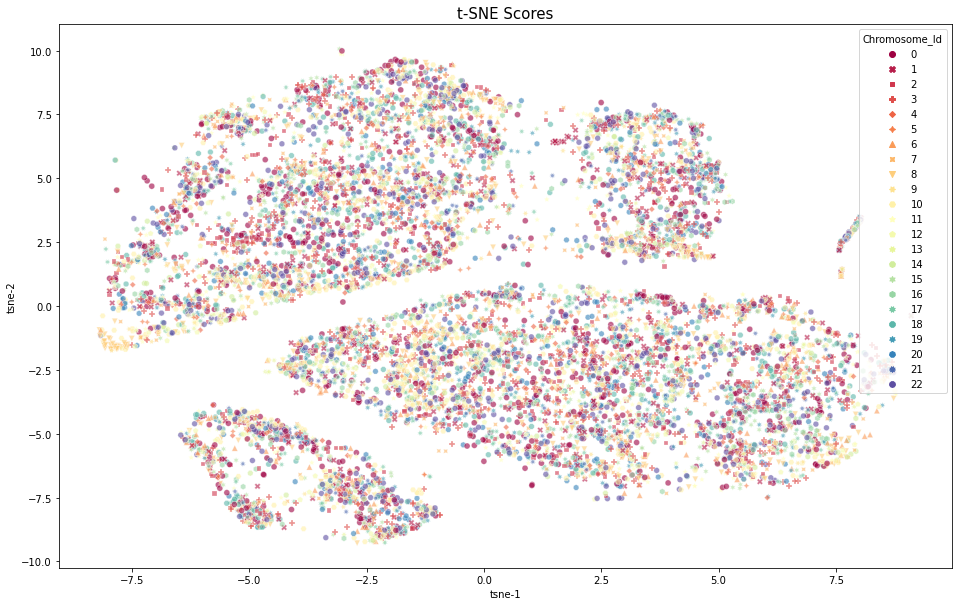

In [44]:
import seaborn as sns
plt.figure(figsize=(16,10))

sns.scatterplot(
    x = "tsne-1", y = "tsne-2",
    hue = "Chromosome_Id",
    palette = sns.color_palette("Spectral", 22,as_cmap=True),
    data = tsne_df,
    legend = "full",
    alpha = 0.6,
    style = "Chromosome_Id"
)
plt.title("t-SNE Scores",fontsize=15)

## SOM

# Feature Selection

## Chi-Square Test

In [15]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [31]:
Y = LabelEncoder().fit_transform(Y)
Y

array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)

In [32]:
chi_scores = chi2(X,Y)
chi_scores

(array([1.39403645e+05, 4.34781546e+06, 2.11928049e+01, 3.37610114e+02,
        2.67519407e+02, 3.10229598e+04, 3.40479938e+02, 3.40479938e+02,
        4.93204853e+01, 1.70806317e+03, 4.71778190e+02, 4.63393125e+04,
        3.49465163e+04, 4.07598023e+04, 4.70933124e+03, 3.77372851e+03,
        1.66189545e+03, 4.90450982e+03, 2.41162327e+05, 2.69418833e+05,
        3.57565311e+05, 3.76051185e+01, 1.04478854e+02, 5.21526733e+04,
        5.54760148e+04, 5.53586943e+04, 1.86756467e+03, 2.45339677e+03,
        4.17768527e+01, 1.56702521e+05, 1.92616303e+05, 1.52749804e+01,
        4.36913323e+06, 3.57075839e+05, 1.53784151e+05, 1.20531694e+05,
        1.28683053e+05, 2.56161064e+04, 1.25576586e+01, 1.15834941e+01,
        1.36395258e+02, 3.78970476e+04, 3.98121939e+02, 1.28639678e+02,
        4.50016738e+02, 2.28258718e+02, 6.44981199e+01, 2.19179670e+00]),
 array([0.00000000e+00, 0.00000000e+00, 5.08851221e-01, 2.68743458e-58,
        4.42441905e-44, 0.00000000e+00, 6.96140657e-59, 6.9614

In [33]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

MC3_Overlap                    1.000000e+00
PICK                           9.653944e-01
IMPACT                         9.447691e-01
CANONICAL                      8.501693e-01
Variant_Classification         5.088512e-01
One_Consequence                2.028068e-02
TRANSCRIPT_STRAND              6.651368e-03
Sequencer                      7.239673e-04
GDC_Validation_Status          4.712585e-06
Consequence                    1.054165e-12
tumor_bam_uuid                 4.591051e-17
TSL                            1.689304e-18
case_id                        3.075331e-36
Tumor_Seq_Allele2              4.424419e-44
Tumor_Seq_Allele1              2.687435e-58
Matched_Norm_Sample_Barcode    6.961407e-59
Tumor_Sample_Barcode           6.961407e-59
src_vcf_id                     1.002955e-70
normal_bam_uuid                1.828020e-81
Matched_Norm_Sample_UUID       5.504420e-86
ENSP                           0.000000e+00
HGNC_ID                        0.000000e+00
CCDS                           0

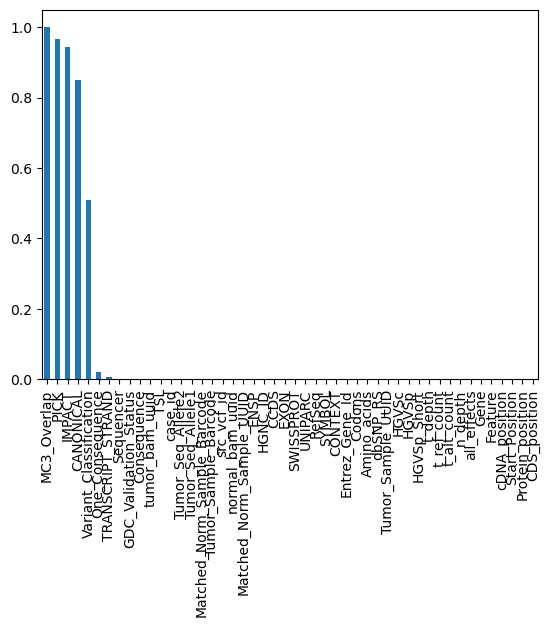

In [34]:
p_values.plot.bar()
plt.show()

In [38]:
selected_features = SelectKBest(chi2,k=2).fit(X,Y)
X.columns[selected_features.get_support()]

Index(['Start_Position', 'CCDS'], dtype='object')

## mRMR

In [130]:
from mrmr import mrmr_classif
from mrmr import mrmr_regression
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,...,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status,MC3_Overlap
0,1695,3470,13,64,1,432,16,16,0,12,...,1,1,1,902,31,7,20,1,1,1
1,344,3555,9,64,1,637,16,16,0,12,...,2,1,1,3914,31,7,20,1,1,1
2,6058,4646,13,31,49,104,16,16,0,12,...,1,1,1,8997,31,7,20,1,0,1
3,689,9262,0,31,49,1,16,16,0,12,...,3,1,1,6256,31,7,20,1,0,0
4,5014,9325,15,31,49,1,16,16,0,12,...,0,1,1,823,31,7,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,1616,1394,13,31,49,1829,23,23,0,45,...,1,1,1,4484,5,26,45,5,0,1
10445,1921,3761,9,83,20,1,23,23,0,45,...,2,1,1,4483,5,26,45,5,0,1
10446,6697,5959,9,83,1,1,23,23,0,45,...,2,0,0,2998,5,26,45,5,0,1
10447,2491,7105,9,31,49,1,23,23,0,45,...,2,0,2,8480,5,26,45,5,0,1


In [131]:
Y = LabelEncoder().fit_transform(Y)

In [134]:
selected_features = mrmr_classif(X=X, y=Y, K=10)

100%|██████████| 10/10 [00:00<00:00, 37.65it/s]


In [135]:
selected_features

['CCDS',
 'EXON',
 'Start_Position',
 'tumor_bam_uuid',
 'SYMBOL',
 'TRANSCRIPT_STRAND',
 'Feature',
 'Sequencer',
 'SWISSPROT',
 't_ref_count']

In [98]:
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,...,IMPACT,PICK,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_Validation_Status,MC3_Overlap
0,2.132512,2.213994,1.291725,1.643721,0.526589,1.955965,1.343703,1.343703,0.0,1.271150,...,0.526589,0.526589,0.526589,2.054857,1.496434,1.124748,1.397363,0.526589,0.526589,0.526589
1,1.923306,2.216634,1.194706,1.643721,0.526589,2.009333,1.343703,1.343703,0.0,1.271150,...,0.741276,0.526589,0.526589,2.227061,1.496434,1.124748,1.397363,0.526589,0.526589,0.526589
2,2.273084,2.245377,1.291725,1.496434,1.591686,1.732356,1.343703,1.343703,0.0,1.271150,...,0.526589,0.526589,0.526589,2.313006,1.496434,1.124748,1.397363,0.526589,0.000000,0.526589
3,2.019783,2.315875,0.000000,1.496434,1.591686,0.526589,1.343703,1.343703,0.0,1.271150,...,0.869742,0.526589,0.526589,2.276391,1.496434,1.124748,1.397363,0.526589,0.000000,0.000000
4,2.253415,2.316543,1.327761,1.496434,1.591686,0.526589,1.343703,1.343703,0.0,1.271150,...,0.000000,0.526589,0.526589,2.043059,1.496434,1.124748,1.397363,0.526589,0.000000,0.526589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,2.126841,2.109079,1.291725,1.496434,1.591686,2.141485,1.429846,1.429846,0.0,1.574565,...,0.526589,0.526589,0.526589,2.241613,1.026672,1.457646,1.574565,1.026672,0.000000,0.526589
10445,2.147231,2.222752,1.194706,1.692090,1.397363,0.526589,1.429846,1.429846,0.0,1.574565,...,0.741276,0.526589,0.526589,2.241589,1.026672,1.457646,1.574565,1.026672,0.000000,0.526589
10446,2.283358,2.271386,1.194706,1.692090,0.526589,0.526589,1.429846,1.429846,0.0,1.574565,...,0.741276,0.000000,0.000000,2.197895,1.026672,1.457646,1.574565,1.026672,0.000000,0.526589
10447,2.177117,2.289368,1.194706,1.496434,1.591686,0.526589,1.429846,1.429846,0.0,1.574565,...,0.741276,0.000000,0.741276,2.307133,1.026672,1.457646,1.574565,1.026672,0.000000,0.526589


In [38]:
Y

array([ 0,  0,  0, ..., 22, 22, 22])

## ANOVA F-test

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import scipy.stats as stats
from scipy.stats import boxcox
import pylab

In [111]:
Y = LabelEncoder().fit_transform(Y)
Y

array([ 0,  0,  0, ..., 22, 22, 22])

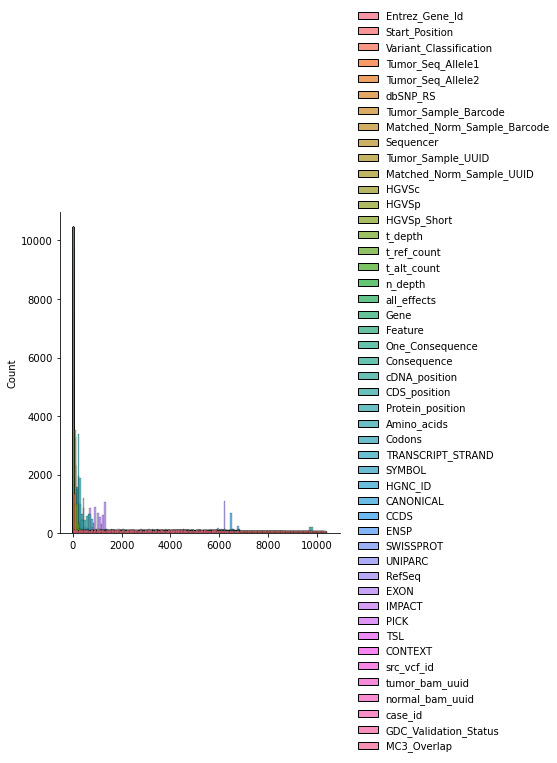

In [112]:
ax = sns.displot(X)

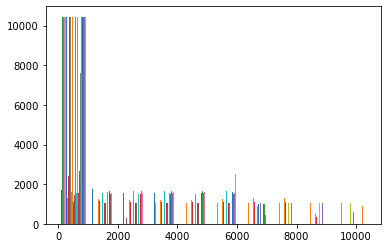

In [113]:
plt.hist(X)
plt.show()

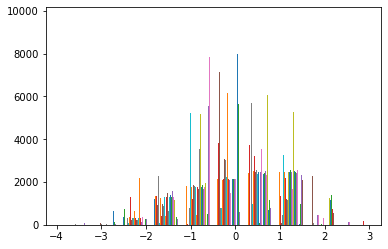

In [116]:
data = X
from sklearn.preprocessing import PowerTransformer
#norml_data = data.apply(lambda n: boxcox(n)[0])
#print(norml_data)

norml_data = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(data)

# histogram
plt.hist(norml_data)
plt.show()

In [122]:
univariate = f_classif(X,Y)
univariate

(array([  5.43192303, 149.21293696,   1.01397037,   1.02799568,
          0.68859659,   1.08624599,   2.62996604,   2.62996604,
          3.08352502,   3.86157758,   3.01531679,   1.41692973,
          0.72028376,   0.93403805,   4.29635366,   4.122413  ,
          3.18331175,   4.0175699 ,   6.38852754,  10.96834366,
         14.58861888,   0.70371893,   0.65744785,   1.35179312,
          1.38339344,   1.39208799,   2.03495282,   0.82722957,
          3.83971557,   6.28902103,   7.42201411,   3.33480843,
        288.39629961,  14.61350892,   5.63445646,   4.04383631,
          5.30861091,   3.93636147,   1.45615795,   2.17715841,
          5.37734092,   1.00331527,   2.41391925,   1.11244267,
          2.25235056,   1.68083946,   3.94072558,   1.35282793]),
 array([2.72037422e-15, 0.00000000e+00, 4.41821773e-01, 4.23845920e-01,
        8.55604316e-01, 3.52865642e-01, 4.77156003e-05, 4.77156003e-05,
        1.52371728e-06, 2.69748070e-09, 2.59330578e-06, 9.29715212e-02,
        8.2328

<AxesSubplot:>

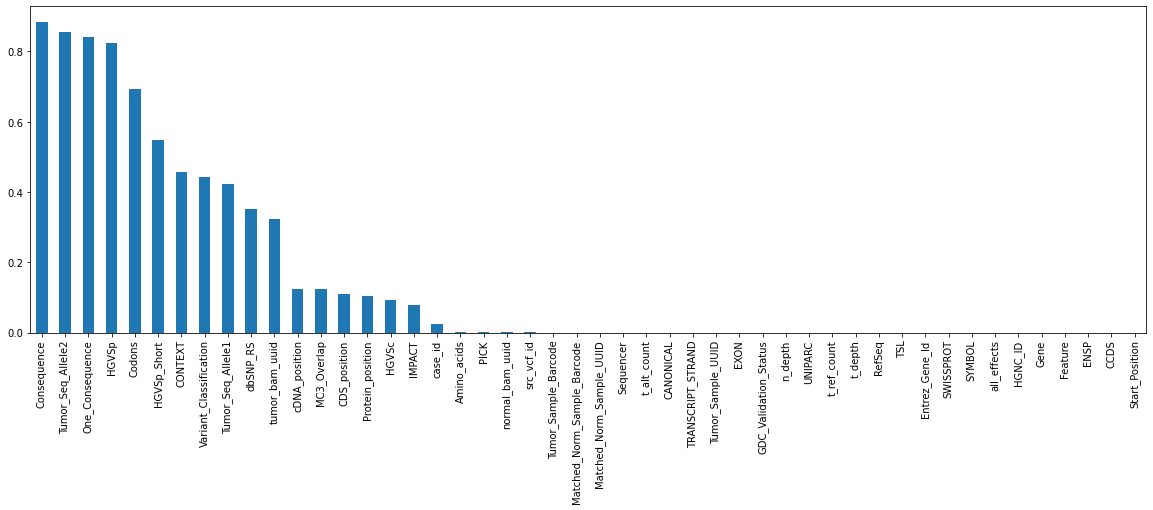

In [123]:
univariate = pd.Series(univariate[1],index = X.columns)
univariate.sort_values(ascending = False , inplace = True)
univariate.plot.bar(figsize=(20,6))

In [126]:
selected_features = SelectKBest(f_classif,k=10).fit(X,Y)
X.columns[selected_features.get_support()]

Index(['Entrez_Gene_Id', 'Start_Position', 'all_effects', 'Gene', 'Feature',
       'SYMBOL', 'HGNC_ID', 'CCDS', 'ENSP', 'SWISSPROT'],
      dtype='object')

In [36]:
fvalue_Best = SelectKBest(f_classif, k=2)
X_kbest = fvalue_Best.fit_transform(X, Y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[4.40084720e+07 3.42400000e+03]
 [4.48032800e+07 4.63900000e+03]
 [5.67407110e+07 1.95900000e+03]
 ...
 [7.79694340e+07 3.14700000e+03]
 [1.02657224e+08 3.15600000e+03]
 [1.52991432e+08 1.40600000e+03]]
Original number of features: (10449, 48)
Reduced number of features: (10449, 2)


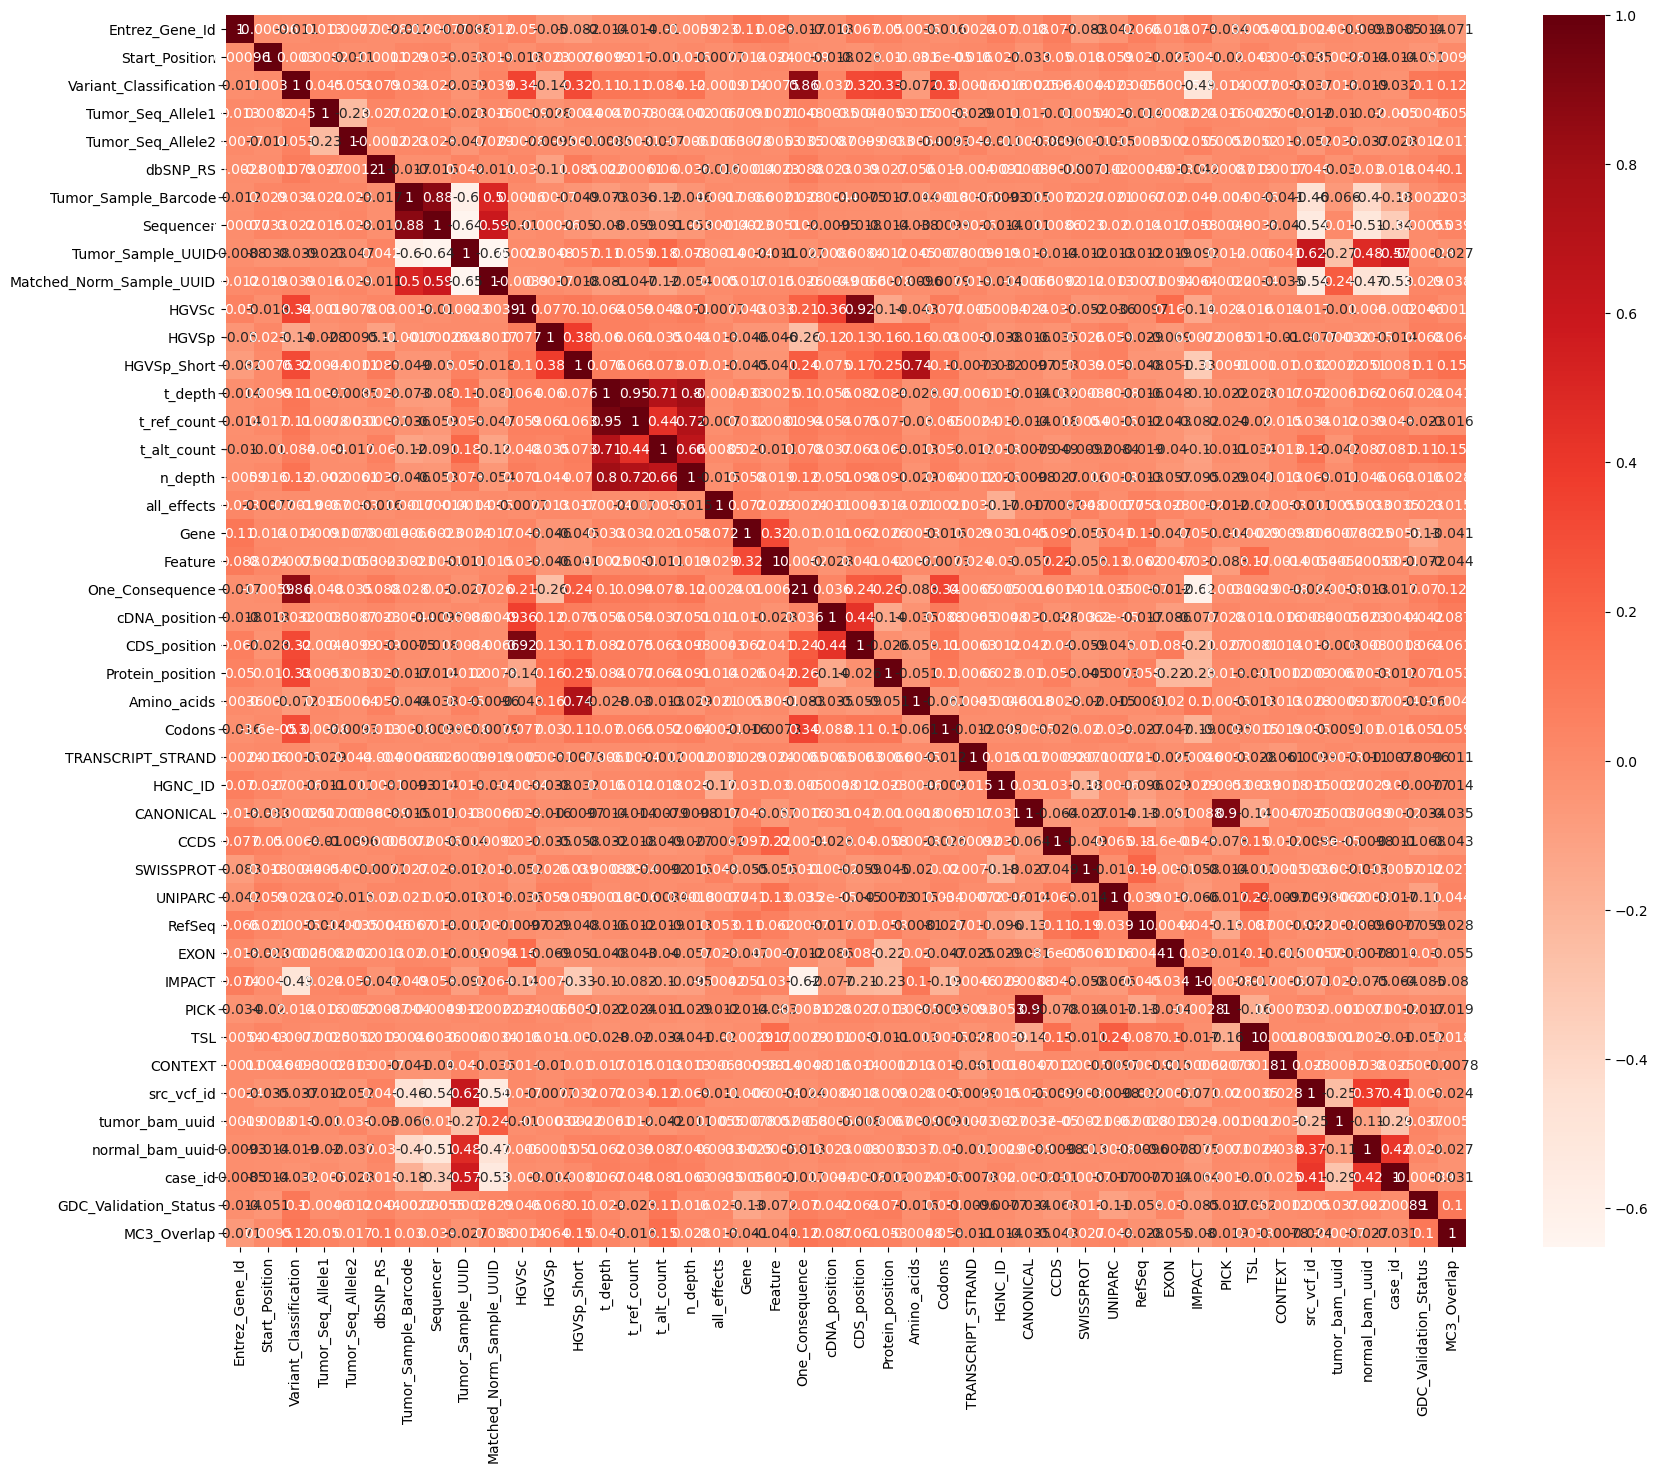

In [55]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(20,16))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
#Correlation with output variable
cor_target = abs(cor["Variant_Classification"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Variant_Classification    1.000000
One_Consequence           0.861771
Name: Variant_Classification, dtype: float64

In [54]:
get_correlated_cols(X)

[]


[]